# Introduction

Welcome to the California Housing Prices Prediction Project! The main objective of this project is to predict housing prices in California using linear regression. We will be using the Housing.csv dataset, which contains various features related to housing properties in California.



### Objective

The primary objective of this project is to **develop a predictive model** bold text using **linear regression** to estimate house prices based on the features provided in the dataset. By the end of this project, we aim to:

- **Understand the relationship** between various features and house prices.
- **Build a linear regression model** to predict house prices.
- **Evaluate the performance of the model** using appropriate metrics.
- **Visualize the results** to gain further insights into the model's accuracy.

###Project Steps

<details>
  <summary><font color='gold'>Environment Setup</font></summary>
  <ul>
    <li>Install necessary libraries and dependencies for the project.</li>
    <li>Set up the development environment and configure the workspace.</li>
  </ul>
</details>
<details>
  <summary><font color='gold'>Exploratory Data Analysis (EDA)</font></summary>
  <ul>
    <li>Load the housing.csv dataset and perform an initial exploration to understand its structure and contents.</li>
    <li>Examine the features and target variable, and gain insights into the data distribution.</li>
  </ul>
</details>

<details>
  <summary><font color='gold'>Data Preprocessing</font></summary>
  <ul>
    <li>Handle any missing values in the dataset to ensure data integrity.</li>
    <li>Encode categorical variables if present and scale numerical features to standardize the data.</li>
  </ul>
</details>

<details>
  <summary><font color='gold'>Data Splitting</font></summary>
  <ul>
    <li>Divide the dataset into training and testing sets to evaluate the model's performance on unseen data.</li>
  </ul>
</details>

<details>
  <summary><font color='gold'>Model Training</font></summary>
  <ul>
    <li>Implement a linear regression model using the training data.</li>
    <li>Train the model to learn the relationship between the features and the target variable (house prices).</li>
  </ul>
</details>

<details>
  <summary><font color='gold'>Model Evaluation</font></summary>
  <ul>
    <li>Assess the model's performance using metrics such as Mean Squared Error (MSE) and R-squared (R²).</li>
    <li>Evaluate how well the model predicts house prices on the testing set.</li>
  </ul>
</details>

<details>
  <summary><font color='gold'>Conclusion</font></summary>
  <ul>
    <li>Summarize the findings and discuss the model's strengths and potential areas for improvement.</li>
  </ul>
</details>


### Dataset Information

1. <font color= 'lightblue'>longitude: </font>A measure of how far west a house is; a higher value is farther west
2. <font color= 'lightblue'>latitude: </font> A measure of how far north a house is; a higher value is farther north
3. <font color= 'lightblue'>housingMedianAge: </font> Median age of a house within a block; a lower number is a newer building
4. <font color= 'lightblue'>totalRooms: </font> Total number of rooms within a block
5. <font color= 'lightblue'>totalBedrooms: </font> Total number of bedrooms within a block
6. <font color= 'lightblue'>population: </font> Total number of people residing within a block
7. <font color= 'lightblue'>households: </font> Total number of households, a group of people residing within a home unit, for a block
8. <font color= 'lightblue'>medianIncome: </font> Median income for households within a block of houses (measured in tens of thousands of US Dollars)
9. <font color= 'lightblue'>medianHouseValue: </font> Median house value for households within a block (measured in US Dollars)
10. <font color= 'lightblue'>oceanProximity: </font> Location of the house w.r.t ocean/sea

# Development

## Enviroment Setup

In [61]:
#Data Management Libraries
import pandas as pd
import numpy as np
#Visual Libraries
import matplotlib.pyplot as plt
import seaborn as sns
#Scaling Libraries/Methods
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
#Modeling Libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score

In [62]:
# URL of the raw CSV file
url = 'https://raw.githubusercontent.com/Lucas-pin/IA-ML/main/housing.csv'

# Read the CSV file into a DataFrame
raw_data = pd.read_csv(url)

#raw_data = pd.read_csv('housing.csv')

<font color='red'> **NOTE** </font>: If you could not execute the previous code , upload the attached csv (Housing.csv), uncomment the last line and comment the fifth line

## Exploratory Data Analysis (EDA)

In [63]:
#First we need understand deepest the structure of dataset and what kind of data we are going to manipulate
print("Number of rows and columns:")
print(raw_data.shape, "\n")
print("Column names:")
print(raw_data.columns, "\n")
print("Data types and null qty:")
print(raw_data.info(),"\n")


Number of rows and columns:
(20640, 10) 

Column names:
Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object') 

Data types and null qty:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: fl

<font color = 'lightblue'> **Observation** :</font> total_bedrooms column has null values. Later it will be evaluated how these values ​​are treated.

In [64]:
ocean_proximity_values = raw_data['ocean_proximity'].unique() # The 'ocean_proximity' column has been separated to see possible values.
print(ocean_proximity_values)

['NEAR BAY' '<1H OCEAN' 'INLAND' 'NEAR OCEAN' 'ISLAND']


In [65]:
# Calculate the percentage of occurrence of each value in the 'ocean_proximity' column.
percentage_counts = (raw_data['ocean_proximity'].value_counts(normalize=True) * 100).round(2)

print(percentage_counts)

ocean_proximity
<1H OCEAN     44.26
INLAND        31.74
NEAR OCEAN    12.88
NEAR BAY      11.09
ISLAND         0.02
Name: proportion, dtype: float64


<font color = 'red'> *Note* :</font>
The following method summarizes statistics such as count, mean, standard deviation, minimum, maximum, and quartiles for each numeric column of the DataFrame. Therefore, we need to separate numerical and categorical data to use it correctly.

In [66]:
numerical_data = raw_data.drop('ocean_proximity', axis = 1) # To drop a column you have to specified 'axis = 1'
categorical_data = raw_data['ocean_proximity'] # Create a new dataframe that contain only 'ocean_proximity' column

In [67]:
numerical_data.describe().round(2) # Pandas 'describe' method provides statistical information about Dataframe

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.00,20640.00,20640.00,20640.00,20433.00,20640.00,20640.00,20640.00,20640.00
mean,-119.57,35.63,28.64,2635.76,537.87,1425.48,499.54,3.87,206855.82
std,2.00,2.14,12.59,2181.62,421.39,1132.46,382.33,1.90,115395.62
min,-124.35,32.54,1.00,2.00,1.00,3.00,1.00,0.50,14999.00
25%,-121.80,33.93,18.00,1447.75,296.00,787.00,280.00,2.56,119600.00
50%,-118.49,34.26,29.00,2127.00,435.00,1166.00,409.00,3.53,179700.00
75%,-118.01,37.71,37.00,3148.00,647.00,1725.00,605.00,4.74,264725.00
max,-114.31,41.95,52.00,39320.00,6445.00,35682.00,6082.00,15.00,500001.00


###Explanation


 Mean $(μ)$:

$$μ = \frac{\sum_{i=1}^{N} x_i}{N} $$

 Standard deviation $(σ)$:

$$\sigma = \sqrt{\frac{\sum_{i=1}^{N} (x_i - \mu)^2}{N}}]$$

Where:
- $( \sigma )$ is theStandard deviation.
- $( \mu )$ is the mean.
- ( N ) is the total number of data points.
- $( x_i )$ represents each data point value.



<font color= 'gold'>How can we determine if a standard deviation is statistically significant? And what does it imply for a standard deviation to be significant? </font>

To determine if the standard deviation is significant, we can calculate the coefficient of variation (CV), which is the standard deviation divided by the mean, and express it as a percentage:

$CV = \left( \frac{{std}}{{mean}} \right) \times 100$

A high coefficient of variation, typically above 30-40%, suggests significant data dispersion relative to the mean, indicating a large standard deviation. Consequently, fields with high CV values exhibit considerable variability or dispersion, reflecting a substantial standard deviation relative to the mean.


In [68]:
## So...let's see how is each std
mean = numerical_data.mean() #Pandas method to calculate the mean of Series o Dataframe
std = numerical_data.std() #Pandas method to calculate the standard deviation of Series o Dataframe
cv = ((std / mean) * 100).round(2)
print(cv)

longitude             -1.68
latitude               5.99
housing_median_age    43.94
total_rooms           82.77
total_bedrooms        78.34
population            79.44
households            76.54
median_income         49.08
median_house_value    55.79
dtype: float64


<font color= 'lightblue'>**Conclusion**</font>: Based on the coefficients of variation (CV) for each column, it's evident that there is considerable variability within the dataset.

In [69]:
categorical_data.describe()

count         20640
unique            5
top       <1H OCEAN
freq           9136
Name: ocean_proximity, dtype: object

<font color= 'lightblue'>**Conclusion**</font>: the '<1H OCEAN' category is the predominant category in the dataset, accounting for a significant portion of the observations.


## Outliers and Data Distribution

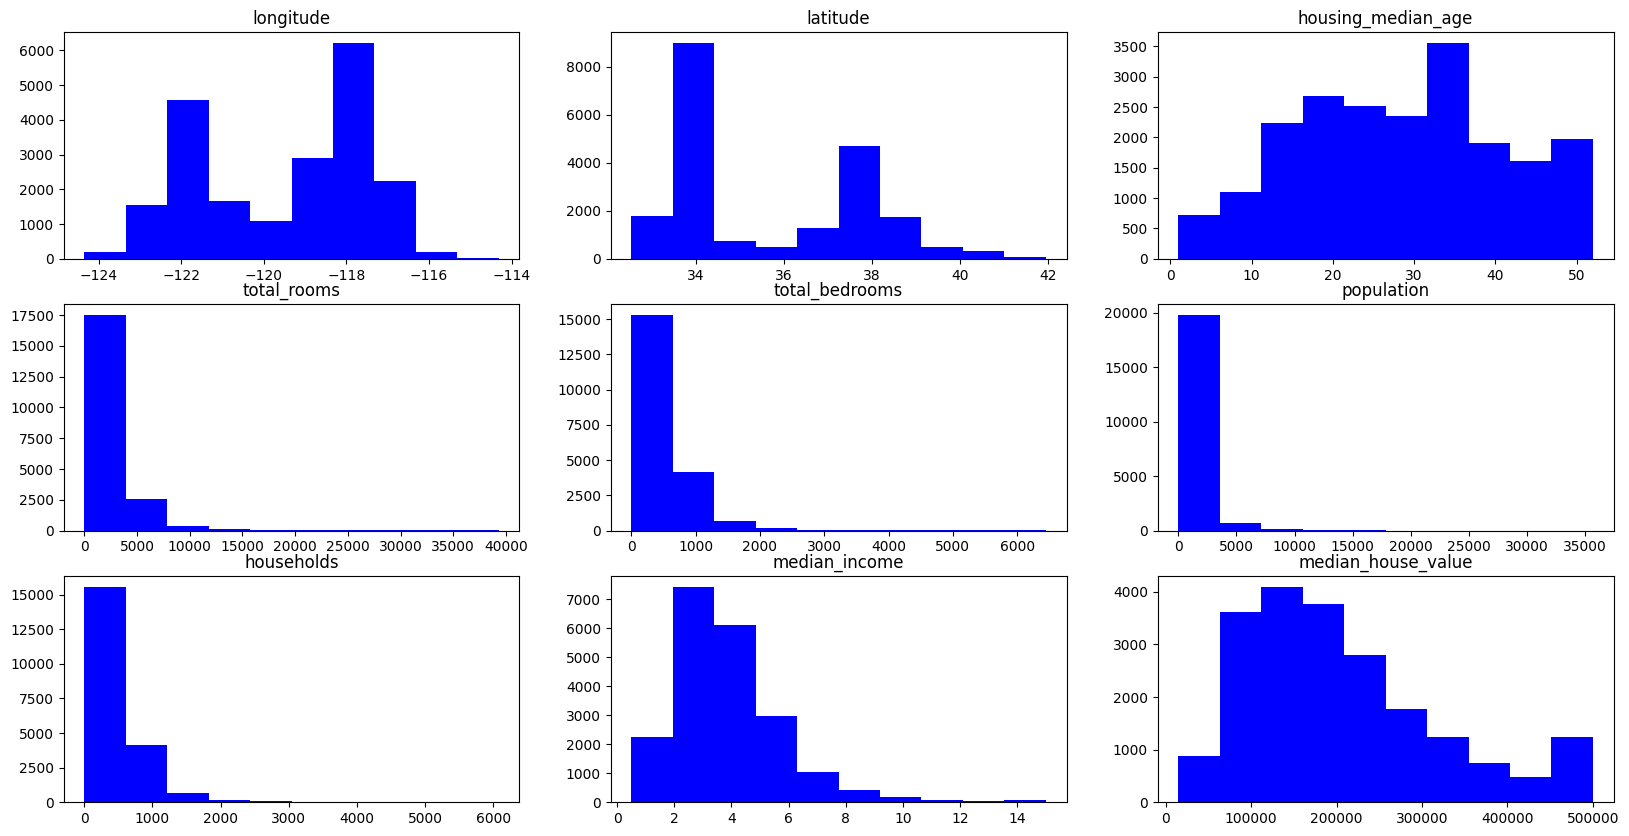

'\nSyntax:\n\nfig = plt.figure(figsize=(20, 10)) -> Create a matplotlib figure of 20px (width) and 10px (height).\nEach \'axN\' is an Axes object that represent a differen histogram.\naxN.hist -> Determine the type of subplot, in this case it is histogram.\nfig.add_subplot(3, 3, n) -> Create a subfigure that will be containing by the main figure. The numbers between brackets represent rows, cols and the subfigure position.\nax1.set_title("longitude") -> Determine the X axes title of each subplot.\nax1.hist(numerical_data["longitude"], color="blue") -> Determines the data that is plotted in each subfigure.\n'

In [70]:
# Crea una figura con 9 subfiguras para mostrar histogramas
fig = plt.figure(figsize=(20, 10))
ax1 = fig.add_subplot(3, 3, 1)
ax2 = fig.add_subplot(3, 3, 2)
ax3 = fig.add_subplot(3, 3, 3)
ax4 = fig.add_subplot(3, 3, 4)
ax5 = fig.add_subplot(3, 3, 5)
ax6 = fig.add_subplot(3, 3, 6)
ax7 = fig.add_subplot(3, 3, 7)
ax8 = fig.add_subplot(3, 3, 8)
ax9 = fig.add_subplot(3, 3, 9)

# Personaliza series de datos de los histogramas
ax1.set_title("longitude")
ax1.hist(numerical_data["longitude"], color="blue")

ax2.set_title("latitude")
ax2.hist(numerical_data["latitude"], color="blue")

ax3.set_title("housing_median_age")
ax3.hist(numerical_data["housing_median_age"], color="blue")

ax4.set_title("total_rooms")
ax4.hist(numerical_data["total_rooms"], color="blue")

ax5.set_title("total_bedrooms")
ax5.hist(numerical_data["total_bedrooms"], color="blue")

ax6.set_title("population")
ax6.hist(numerical_data["population"], color="blue")

ax7.set_title("households")
ax7.hist(numerical_data["households"], color="blue")

ax8.set_title("median_income")
ax8.hist(numerical_data["median_income"], color="blue")

ax9.set_title("median_house_value")
ax9.hist(numerical_data["median_house_value"], color="blue")


plt.show()

"""
Syntax:

fig = plt.figure(figsize=(20, 10)) -> Create a matplotlib figure of 20px (width) and 10px (height).
Each 'axN' is an Axes object that represent a differen histogram.
axN.hist -> Determine the type of subplot, in this case it is histogram.
fig.add_subplot(3, 3, n) -> Create a subfigure that will be containing by the main figure. The numbers between brackets represent rows, cols and the subfigure position.
ax1.set_title("longitude") -> Determine the X axes title of each subplot.
ax1.hist(numerical_data["longitude"], color="blue") -> Determines the data that is plotted in each subfigure.
"""

### How to handle each kind of data distribution

<font color='lightblue'>**Normal Distribution:**</font>

- Mean and Standard Deviation: Descriptive statistics like the mean and standard deviation can provide insights into the central tendency and spread of the data, respectively. These statistics are useful for understanding the distribution's shape and characteristics.
Outliers: Detect and handle outliers using z-scores or the IQR method. Removing or adjusting outliers can improve the accuracy of statistical analyses and models applied to the data.

<font color='lightblue'>**Uniform Distribution:**</font>

- Range: Focus on the range of the data, as uniform distributions exhibit equal probabilities across the specified range. Understanding the minimum and maximum values can provide insights into the spread and coverage of the data.
Binning or Discretization: Consider discretizing the data into bins or intervals, especially if you're dealing with continuous variables. Binning can help visualize and analyze the distribution more effectively.

<font color='lightblue'>**Exponential Distribution:**</font>

- Logarithmic Transformation: If the exponential distribution exhibits right-skewness, consider applying a logarithmic transformation to normalize the data. This transformation can reduce skewness and make the distribution more symmetric, facilitating statistical analyses and visualization.
- Rate Parameter: Estimate the rate parameter (λ) of the exponential distribution to understand the rate of decay or growth represented by the distribution. The rate parameter influences the shape and scale of the distribution and can be estimated from the data.
- Outliers: Use appropriate methods to detect and handle outliers, considering the transformed data after applying the logarithmic transformation. Techniques like the IQR method can help identify and address outliers effectively.

<font color='gold'>Syntax useful information:</font>
<details><summary>show information</summary>
  <ul>
    <li>`sns.histplot()`: Plot histogram with KDE (Kernel Density Estimate) for visualizing the data distribution.</li>
    <li>`np.percentile()`: Calculate the quartiles (25th, 50th, 75th percentiles).</li>
    <li>`axvline()`: Add vertical lines at quartile positions.</li>
    <li>`set_title()`: Set the title of the subplot.</li>
    <li>`text()`: Annotate quartiles on the plot.</li>
    <li>The seed value itself is just an arbitrary number used to initialize the generator, and any integer can be used. The key points to understand are:
      <ul>
        <li><strong>Consistency:</strong> Using the same seed value will always produce the same sequence of random numbers. For example, if you use the seed 42, you will always get the same sequence every time you run your code with that seed. Similarly, using the seed 100 will produce a different, but consistent, sequence every time you use it.</li>
        <li><strong>Different Sequences:</strong> Different seed values will produce different sequences of random numbers. This is useful if you want to generate different sets of random data in different runs or experiments.</li>
      </ul>
    </li>
  </ul>
</details>

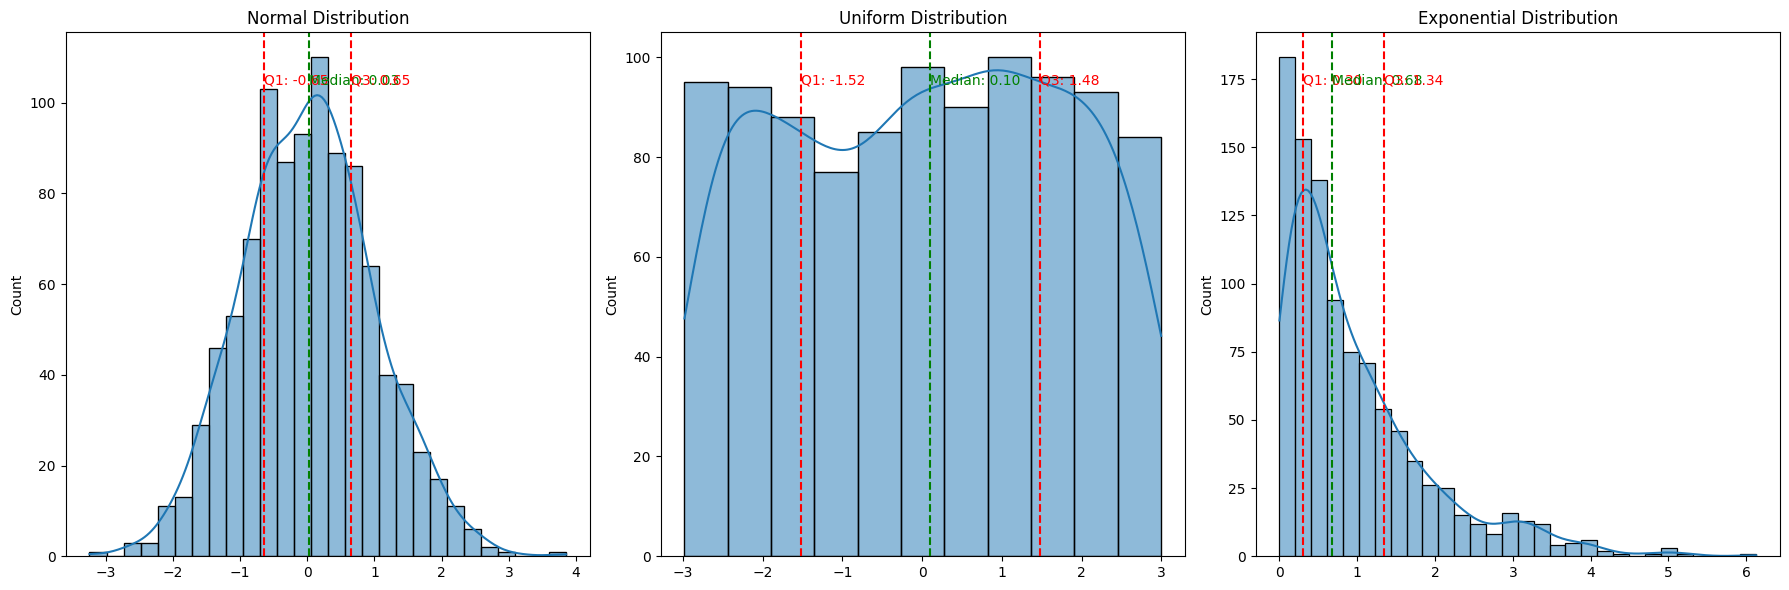

In [71]:
# Set the random seed for reproducibility
np.random.seed(42)

# Generate data with different distributions
data_normal = np.random.normal(loc=0, scale=1, size=1000)     # Normal distribution
data_uniform = np.random.uniform(low=-3, high=3, size=1000)   # Uniform distribution
data_exponential = np.random.exponential(scale=1, size=1000)  # Exponential distribution

# Create a figure and subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Annotate quartiles for the normal distribution
sns.histplot(data_normal, kde=True, ax=axes[0])
quartiles_normal = np.percentile(data_normal, [25, 50, 75])
axes[0].axvline(quartiles_normal[0], color='r', linestyle='--')  # Q1
axes[0].axvline(quartiles_normal[1], color='g', linestyle='--')  # Median
axes[0].axvline(quartiles_normal[2], color='r', linestyle='--')  # Q3
axes[0].set_title('Normal Distribution')
axes[0].text(quartiles_normal[0], max(axes[0].get_ylim())*0.9, 'Q1: {:.2f}'.format(quartiles_normal[0]), color='r')
axes[0].text(quartiles_normal[1], max(axes[0].get_ylim())*0.9, 'Median: {:.2f}'.format(quartiles_normal[1]), color='g')
axes[0].text(quartiles_normal[2], max(axes[0].get_ylim())*0.9, 'Q3: {:.2f}'.format(quartiles_normal[2]), color='r')

# Annotate quartiles for the uniform distribution
sns.histplot(data_uniform, kde=True, ax=axes[1])
quartiles_uniform = np.percentile(data_uniform, [25, 50, 75])
axes[1].axvline(quartiles_uniform[0], color='r', linestyle='--')  # Q1
axes[1].axvline(quartiles_uniform[1], color='g', linestyle='--')  # Median
axes[1].axvline(quartiles_uniform[2], color='r', linestyle='--')  # Q3
axes[1].set_title('Uniform Distribution')
axes[1].text(quartiles_uniform[0], max(axes[1].get_ylim())*0.9, 'Q1: {:.2f}'.format(quartiles_uniform[0]), color='r')
axes[1].text(quartiles_uniform[1], max(axes[1].get_ylim())*0.9, 'Median: {:.2f}'.format(quartiles_uniform[1]), color='g')
axes[1].text(quartiles_uniform[2], max(axes[1].get_ylim())*0.9, 'Q3: {:.2f}'.format(quartiles_uniform[2]), color='r')

# Annotate quartiles for the exponential distribution
sns.histplot(data_exponential, kde=True, ax=axes[2])
quartiles_exponential = np.percentile(data_exponential, [25, 50, 75])
axes[2].axvline(quartiles_exponential[0], color='r', linestyle='--')  # Q1
axes[2].axvline(quartiles_exponential[1], color='g', linestyle='--')  # Median
axes[2].axvline(quartiles_exponential[2], color='r', linestyle='--')  # Q3
axes[2].set_title('Exponential Distribution')
axes[2].text(quartiles_exponential[0], max(axes[2].get_ylim())*0.9, 'Q1: {:.2f}'.format(quartiles_exponential[0]), color='r')
axes[2].text(quartiles_exponential[1], max(axes[2].get_ylim())*0.9, 'Median: {:.2f}'.format(quartiles_exponential[1]), color='g')
axes[2].text(quartiles_exponential[2], max(axes[2].get_ylim())*0.9, 'Q3: {:.2f}'.format(quartiles_exponential[2]), color='r')

# Adjust layout and show the figure
plt.tight_layout()
plt.show()


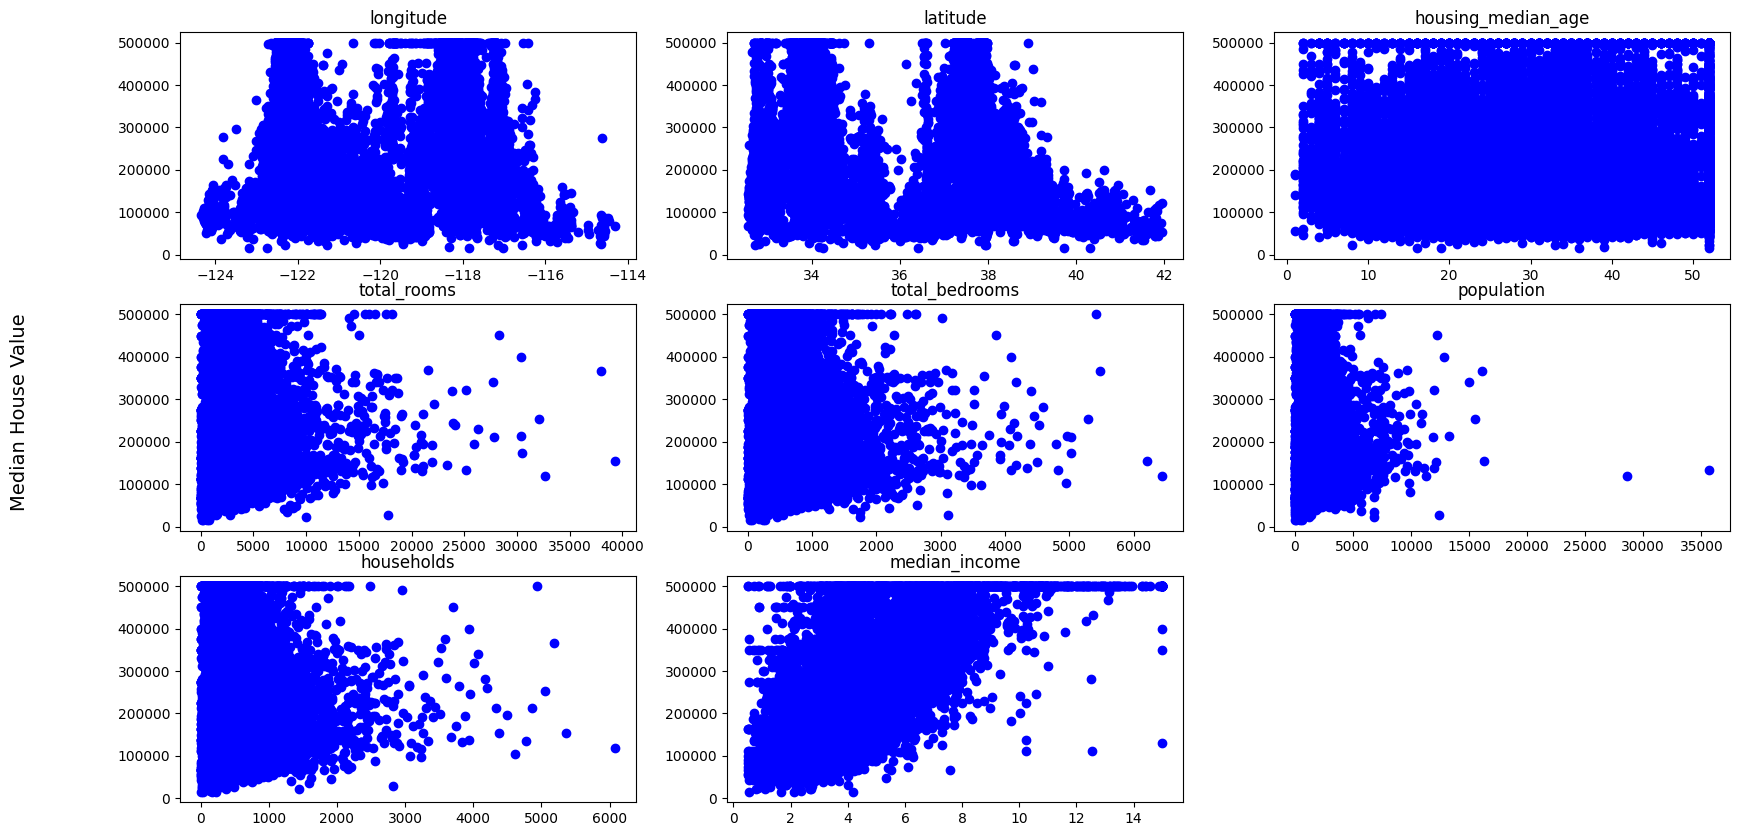

In [72]:
# A first approximation of correlation with the objective and the rest of the variables
# Create a figure with 9 subpolots, and determine each position
fig = plt.figure(figsize=(20, 10))
ax1 = fig.add_subplot(3, 3, 1)
ax2 = fig.add_subplot(3, 3, 2)
ax3 = fig.add_subplot(3, 3, 3)
ax4 = fig.add_subplot(3, 3, 4)
ax5 = fig.add_subplot(3, 3, 5)
ax6 = fig.add_subplot(3, 3, 6)
ax7 = fig.add_subplot(3, 3, 7)
ax8 = fig.add_subplot(3, 3, 8)

# Subplot definition and personalization
ax1.set_title("longitude")
ax1.scatter(numerical_data["longitude"], numerical_data["median_house_value"], color="blue")

ax2.set_title("latitude")
ax2.scatter(numerical_data["latitude"], numerical_data["median_house_value"], color="blue")

ax3.set_title("housing_median_age")
ax3.scatter(numerical_data["housing_median_age"], numerical_data["median_house_value"], color="blue")

ax4.set_title("total_rooms")
ax4.scatter(numerical_data["total_rooms"], numerical_data["median_house_value"], color="blue")

ax5.set_title("total_bedrooms")
ax5.scatter(numerical_data["total_bedrooms"], numerical_data["median_house_value"], color="blue")

ax6.set_title("population")
ax6.scatter(numerical_data["population"], numerical_data["median_house_value"], color="blue")

ax7.set_title("households")
ax7.scatter(numerical_data["households"], numerical_data["median_house_value"], color="blue")

ax8.set_title("median_income")
ax8.scatter(numerical_data["median_income"], numerical_data["median_house_value"], color="blue")

fig.text(0.04, 0.5, 'Median House Value', va='center', rotation='vertical', fontsize=14)

plt.show()


In [73]:
variables = numerical_data.columns.tolist()
variables
# .columns -> This is an attribute of a DataFrame that returns a pandas Index object containing the column labels.
# .tolist()-> This method converts the pandas Index object to a Python list.

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'median_house_value']

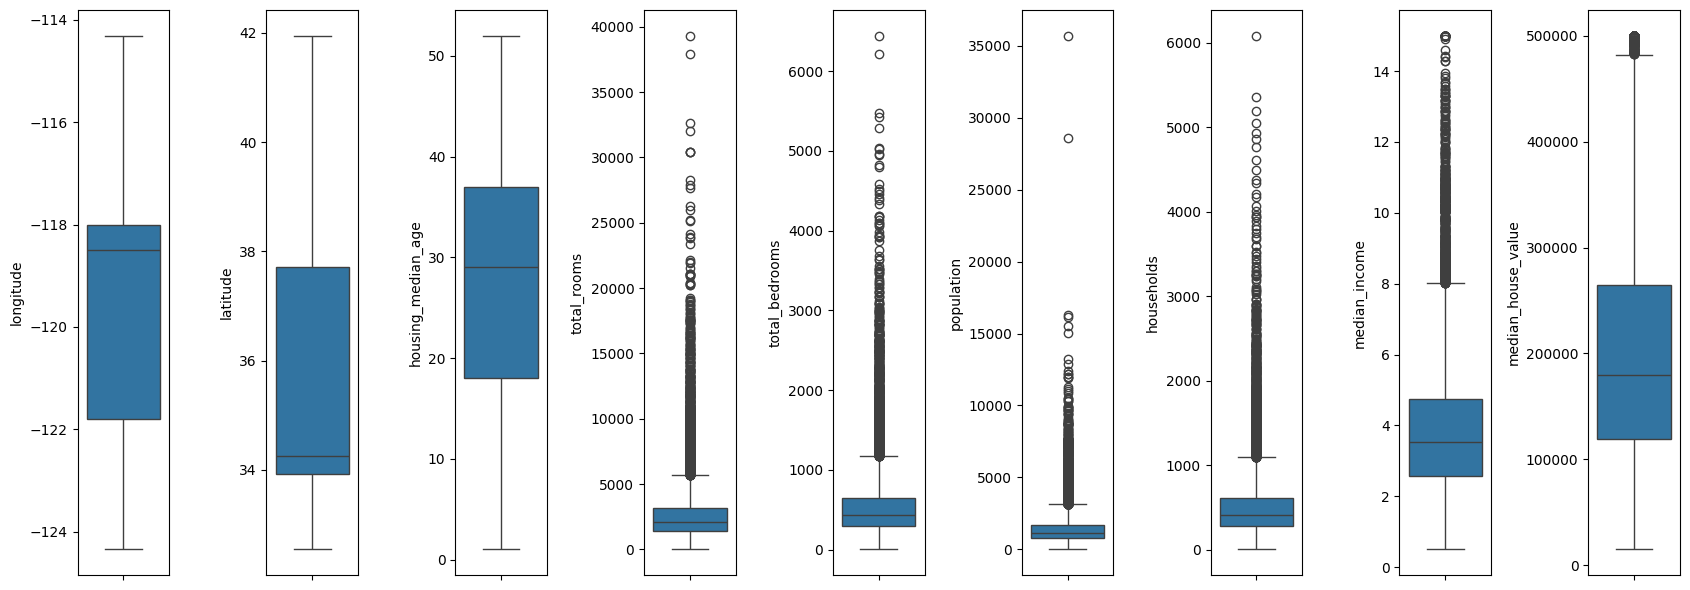

"\nSyntax:\n\nvariables = numerical_data.columns.tolist() -> Extract the column names from the DataFrame 'numerical_data' and convert them to a list.\nfig, axes = plt.subplots(1, len(variables), figsize=(17,6)) -> Create a figure with a row of subplots equal to the number of columns in 'variables', and set the figure size to 17 inches by 6 inches.\nfor ax, column in zip(axes, variables): -> Iterate over each subplot axis and corresponding column name simultaneously.\n    sns.boxplot(y=numerical_data[column], ax=ax) -> Create a boxplot for each column in 'numerical_data' and assign it to the corresponding subplot axis.\nplt.tight_layout() -> Adjust the layout of the subplots to prevent overlapping.\nplt.show() -> Display the figure with all the subplots.\n"

In [74]:
variables = numerical_data.columns.tolist()

fig, axes = plt.subplots(1, len(variables), figsize=(17,6))

for ax, column in zip(axes, variables):
    sns.boxplot(y=numerical_data[column], ax=ax)

plt.tight_layout()
plt.show()

"""
Syntax:

variables = numerical_data.columns.tolist() -> Extract the column names from the DataFrame 'numerical_data' and convert them to a list.
fig, axes = plt.subplots(1, len(variables), figsize=(17,6)) -> Create a figure with a row of subplots equal to the number of columns in 'variables', and set the figure size to 17 inches by 6 inches.
for ax, column in zip(axes, variables): -> Iterate over each subplot axis and corresponding column name simultaneously.
    sns.boxplot(y=numerical_data[column], ax=ax) -> Create a boxplot for each column in 'numerical_data' and assign it to the corresponding subplot axis.
plt.tight_layout() -> Adjust the layout of the subplots to prevent overlapping.
plt.show() -> Display the figure with all the subplots.
"""

To show this kind of plot without any transformation of categorical data it will be necessary to represent based on numerical values. So, it will then be represented based on the target variable.

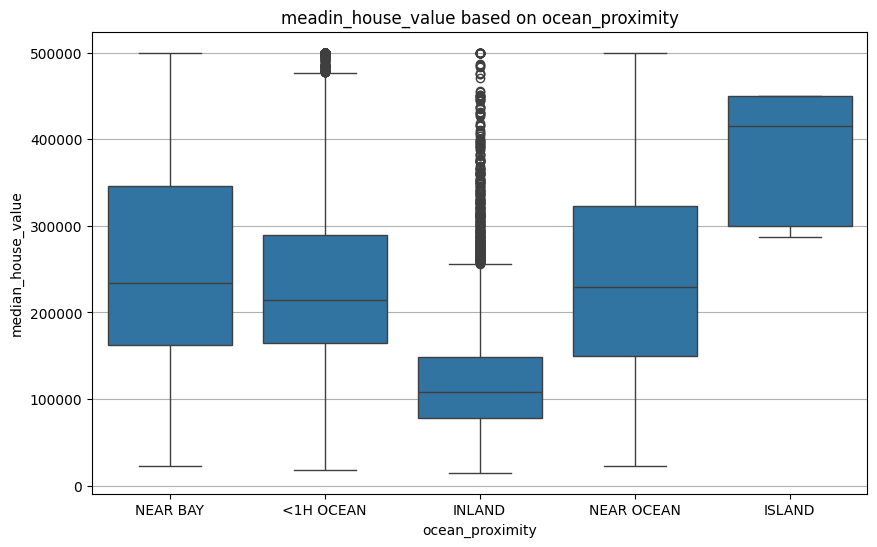

"\nSyntax:\n\nplt.figure(figsize=(10, 6)) -> Create a matplotlib figure of 10 inches (width) and 6 inches (height).\nplt.grid(True) -> Enable grid lines for the entire figure.\nsns.boxplot(x='ocean_proximity', y='median_house_value', data=raw_data) -> Create a boxplot with 'ocean_proximity' on the X axis and 'median_house_value' on the Y axis using the data from 'raw_data'.\nplt.title('Distribución del valor de las casas según proximidad al océano') -> Set the title of the plot.\nplt.show() -> Display the plot.\n"

In [75]:
plt.figure(figsize=(10, 6))
plt.grid(True)
sns.boxplot(x='ocean_proximity', y='median_house_value', data=raw_data)
plt.title('meadin_house_value based on ocean_proximity')
plt.show()

"""
Syntax:

plt.figure(figsize=(10, 6)) -> Create a matplotlib figure of 10 inches (width) and 6 inches (height).
plt.grid(True) -> Enable grid lines for the entire figure.
sns.boxplot(x='ocean_proximity', y='median_house_value', data=raw_data) -> Create a boxplot with 'ocean_proximity' on the X axis and 'median_house_value' on the Y axis using the data from 'raw_data'.
plt.title('Distribución del valor de las casas según proximidad al océano') -> Set the title of the plot.
plt.show() -> Display the plot.
"""

<font color = 'red'> **Important** :</font>
**The box plot relies on normal distributions to determine outliers. So it will be necessary to perform some transformations to try to normalize the distributions and reduce the impact of outliers. Additionally, this could help find a better correlation between the values ​​and the target variable.**

## Data Preprocessing

In [76]:
# Duplicate the raw_data Dataframe
transformed_data = raw_data

In [77]:
transformed_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


### Drop Null Values

In [78]:
# Eliminate null values. In this case only the 'total_bedrooms' column has null values
transformed_data = transformed_data.dropna()

In [79]:
# Let's see how the count values ​​are reduced.
transformed_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


### Discretize data

In [80]:
# Transform the medianIncome values from 'tens of thousands of US Dollars' to US dollars.
transformed_data['median_income'] *= 10000

<ipython-input-80-5d4013db2451>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transformed_data['median_income'] *= 10000


In [81]:
# Define a mapping dictionary with manually assigned values.
proximity_mapping = {
    'NEAR BAY': 4,
    '<1H OCEAN': 1,
    'INLAND': 2,
    'NEAR OCEAN': 3,
    'ISLAND': 5
}

# Apply the mapping to the 'ocean_proximity' column and create a new column 'ocean_proximity_numeric'.
transformed_data['ocean_proximity_numeric'] = transformed_data['ocean_proximity'].map(proximity_mapping)

<ipython-input-81-03f34700322b>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transformed_data['ocean_proximity_numeric'] = transformed_data['ocean_proximity'].map(proximity_mapping)


<font color = 'red'> *Note* :</font>
Mapping categorical data into numerical data is necessary to introduce it into a regression model because regression models require numerical inputs. Categorical variables, such as "ocean_proximity" in this case, represent qualitative attributes or categories rather than numerical values. However, regression models use mathematical equations to estimate relationships between variables, and they require numerical inputs to perform calculations effectively. In addition, exists different methods for this (e.g one_hot_encoding or get_dummies) but in this case it will be done manually to avoid new columns.

In [82]:
# Drop the original column 'ocean_proximity'
transformed_data = transformed_data.drop(['ocean_proximity'], axis = 1)

In [83]:
transformed_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   longitude                20433 non-null  float64
 1   latitude                 20433 non-null  float64
 2   housing_median_age       20433 non-null  float64
 3   total_rooms              20433 non-null  float64
 4   total_bedrooms           20433 non-null  float64
 5   population               20433 non-null  float64
 6   households               20433 non-null  float64
 7   median_income            20433 non-null  float64
 8   median_house_value       20433 non-null  float64
 9   ocean_proximity_numeric  20433 non-null  int64  
dtypes: float64(9), int64(1)
memory usage: 1.7 MB


### Logarithmic method to normalize data distributions

In [84]:
# Apply logarithmic transformations to the columns with exponential data distribution.
transformed_data['total_rooms_log'] = np.log1p(transformed_data['total_rooms'])
transformed_data['total_bedrooms_log'] = np.log1p(transformed_data['total_bedrooms'])
transformed_data['households_log'] = np.log1p(transformed_data['households'])
transformed_data['median_income_log'] = np.log1p(transformed_data['median_income'])
transformed_data['population_log'] = np.log1p(transformed_data['population'])

# Remove the original columns.
transformed_data.drop(['total_rooms', 'total_bedrooms', 'households', 'median_income', 'population'], axis=1, inplace=True)


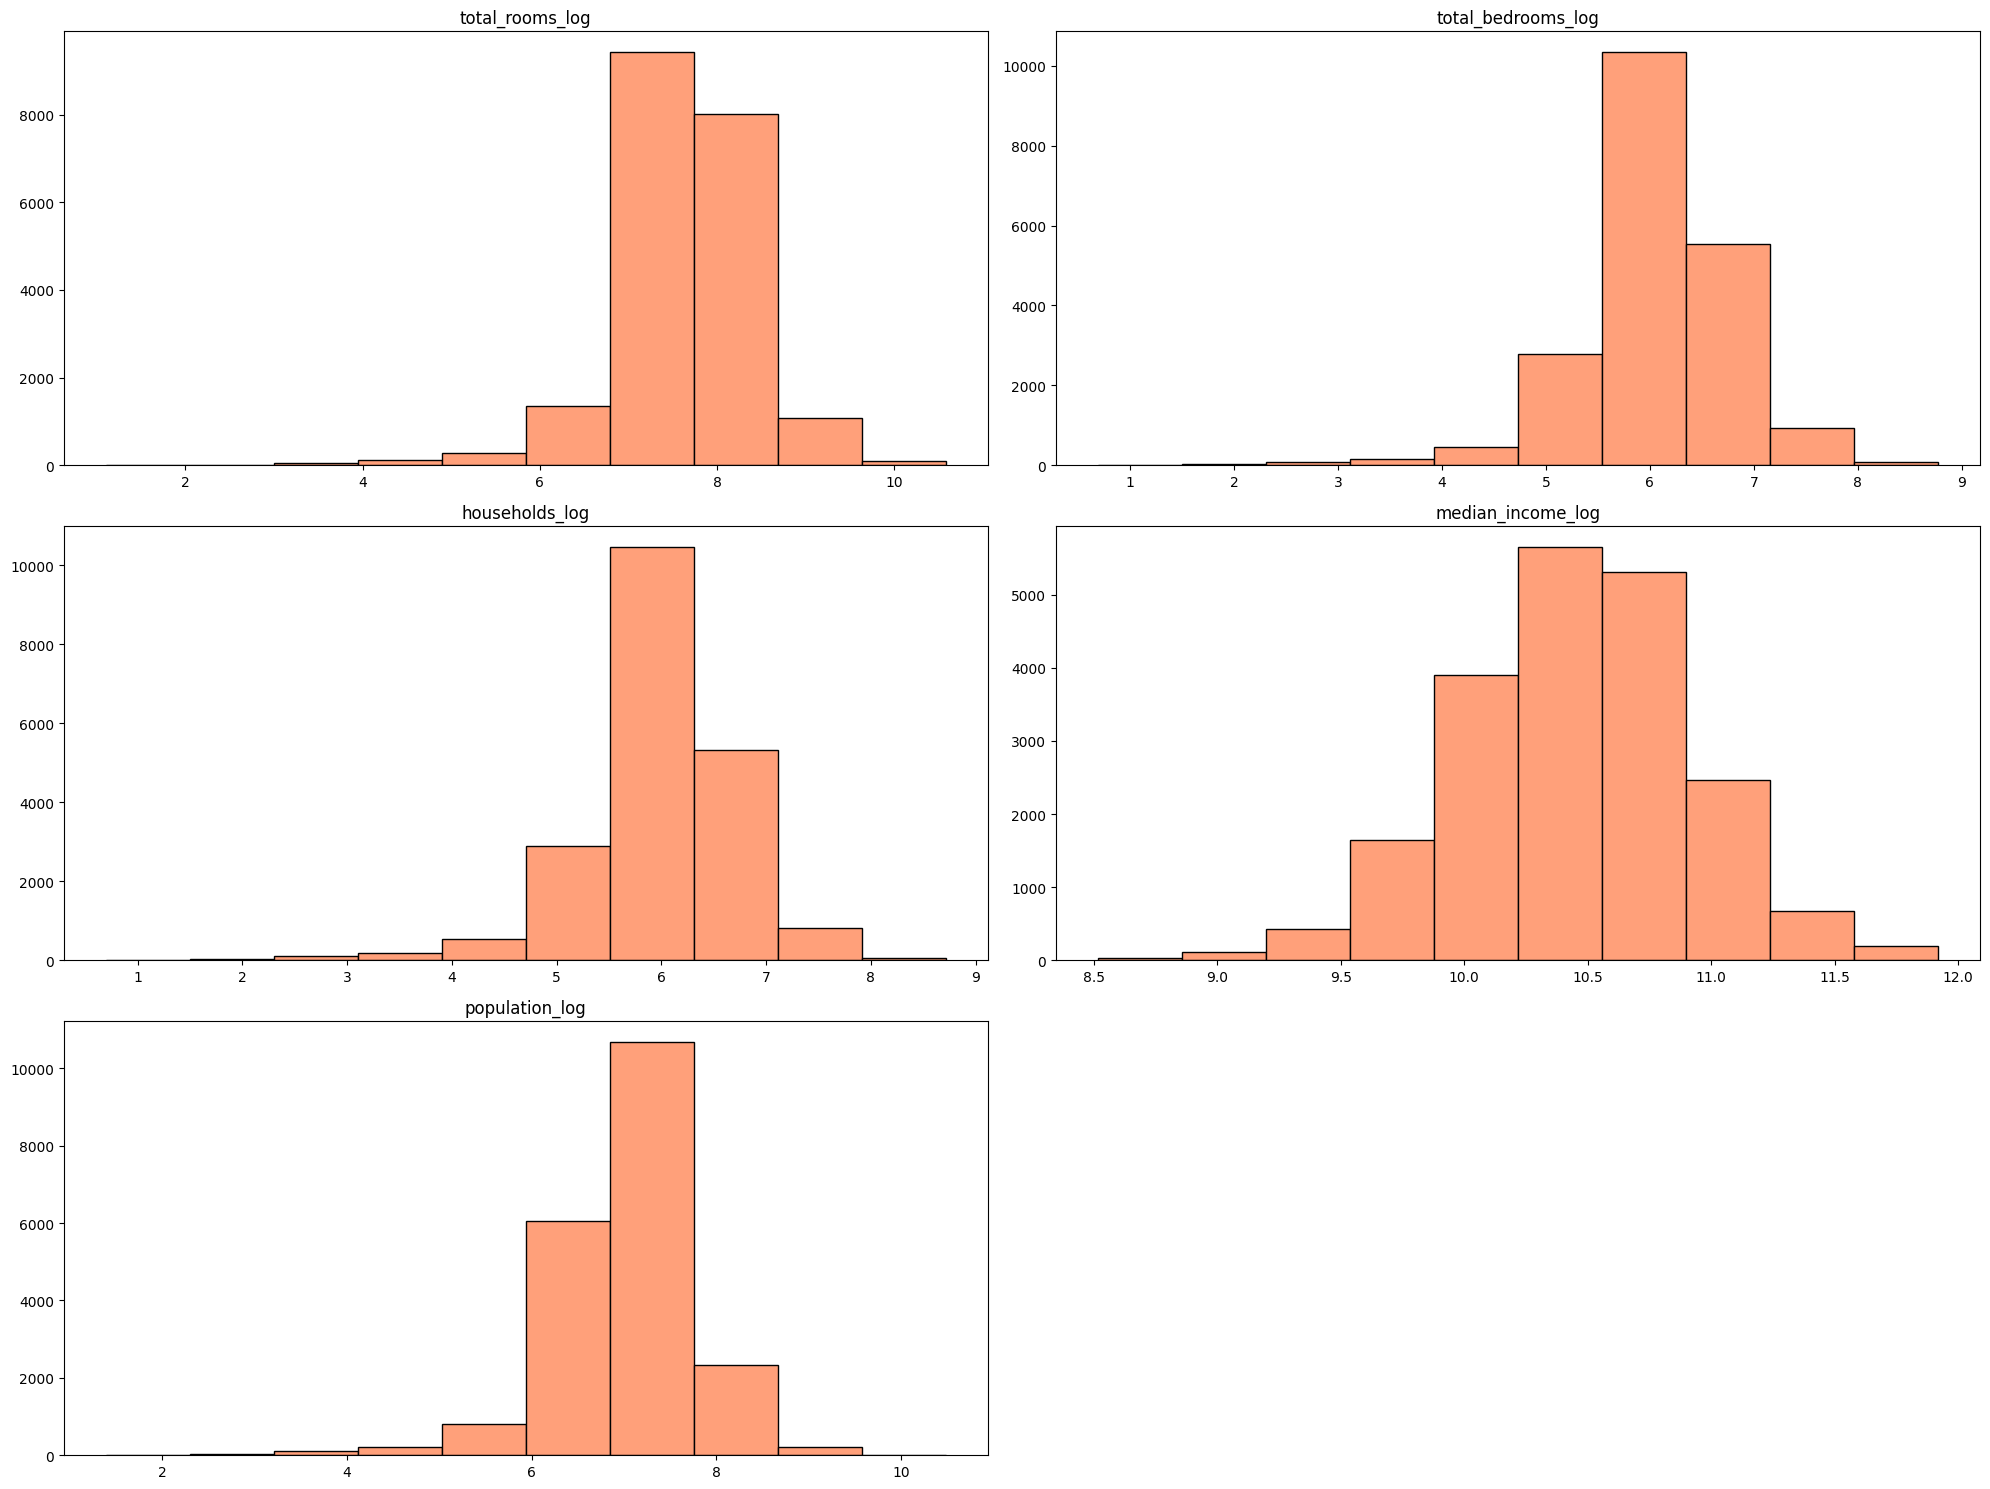

In [85]:
# Create a figure of 20px x 15px
fig = plt.figure(figsize=(20, 15))

# Create subplots
ax1 = fig.add_subplot(3, 2, 1)
ax2 = fig.add_subplot(3, 2, 2)
ax3 = fig.add_subplot(3, 2, 3)
ax4 = fig.add_subplot(3, 2, 4)
ax5 = fig.add_subplot(3, 2, 5)

# Customize and plot histograms with transformed data.
ax1.set_title("total_rooms_log")
ax1.hist(transformed_data["total_rooms_log"], color='lightsalmon', edgecolor='black')

ax2.set_title("total_bedrooms_log")
ax2.hist(transformed_data["total_bedrooms_log"], color='lightsalmon', edgecolor='black')

ax3.set_title("households_log")
ax3.hist(transformed_data["households_log"], color='lightsalmon', edgecolor='black')

ax4.set_title("median_income_log")
ax4.hist(transformed_data["median_income_log"], color='lightsalmon', edgecolor='black')

ax5.set_title("population_log")
ax5.hist(transformed_data["population_log"], color='lightsalmon', edgecolor='black')

# Adjust the layout to avoid overlapping of subplots.
plt.tight_layout()

# Show the plot
plt.show()

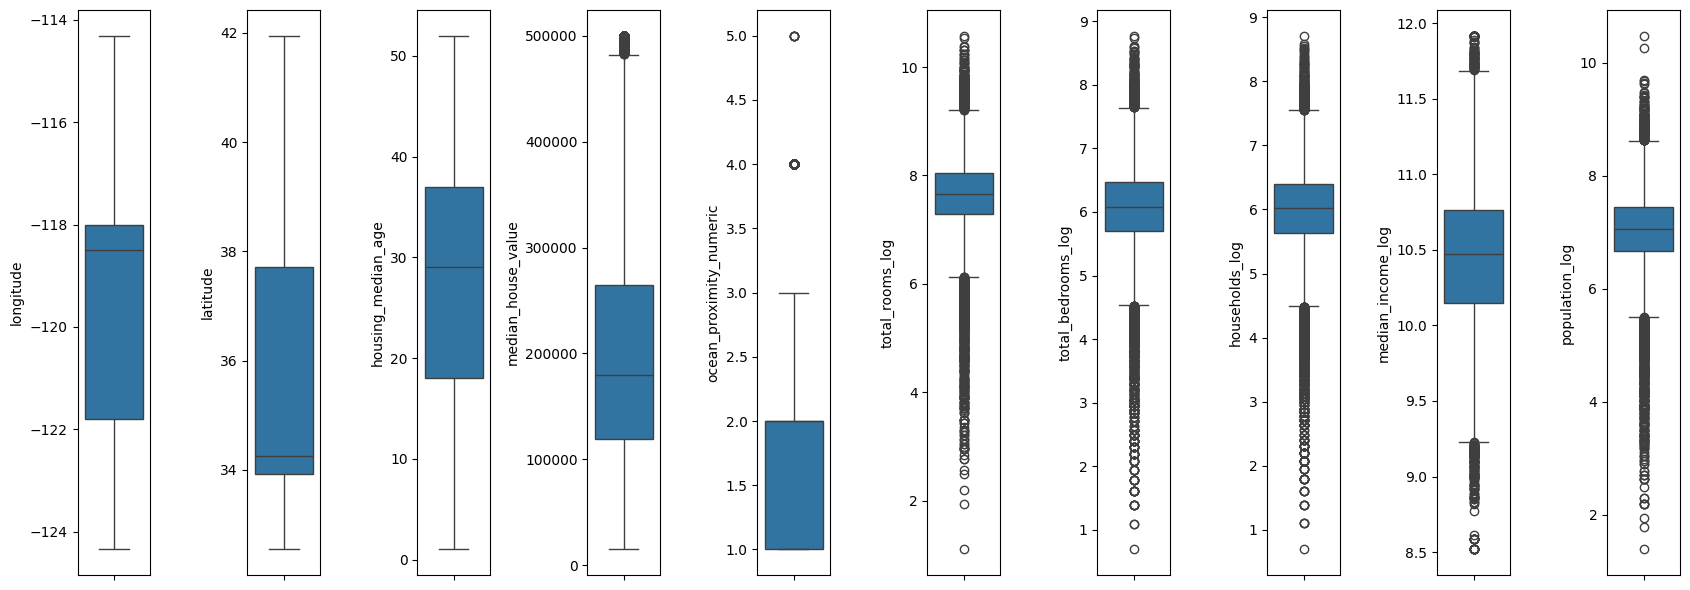

In [86]:
# Make a new boxplots using transformed data
log_variables = transformed_data.columns
fig, axes = plt.subplots(1, len(log_variables), figsize=(17, 6))

for ax, column in zip(axes, log_variables):
    sns.boxplot(y=transformed_data[column], ax=ax)

plt.tight_layout()
plt.show()

### Eliminate Outliers with IQR method (Interquartile Range)

In [87]:
# Calculate the interquartile range for each column.
Q1 = transformed_data.quantile(0.25)
Q3 = transformed_data.quantile(0.75)
IQR = Q3 - Q1

# Define a threshold to detect outliers
umbral = 1.5

# Filter outliers in each column.
outliers = ((transformed_data < (Q1 - umbral * IQR)) | (transformed_data > (Q3 + umbral * IQR))).any(axis=1)

# Remove rows containing outliers.
cleaned_data = transformed_data[~outliers]

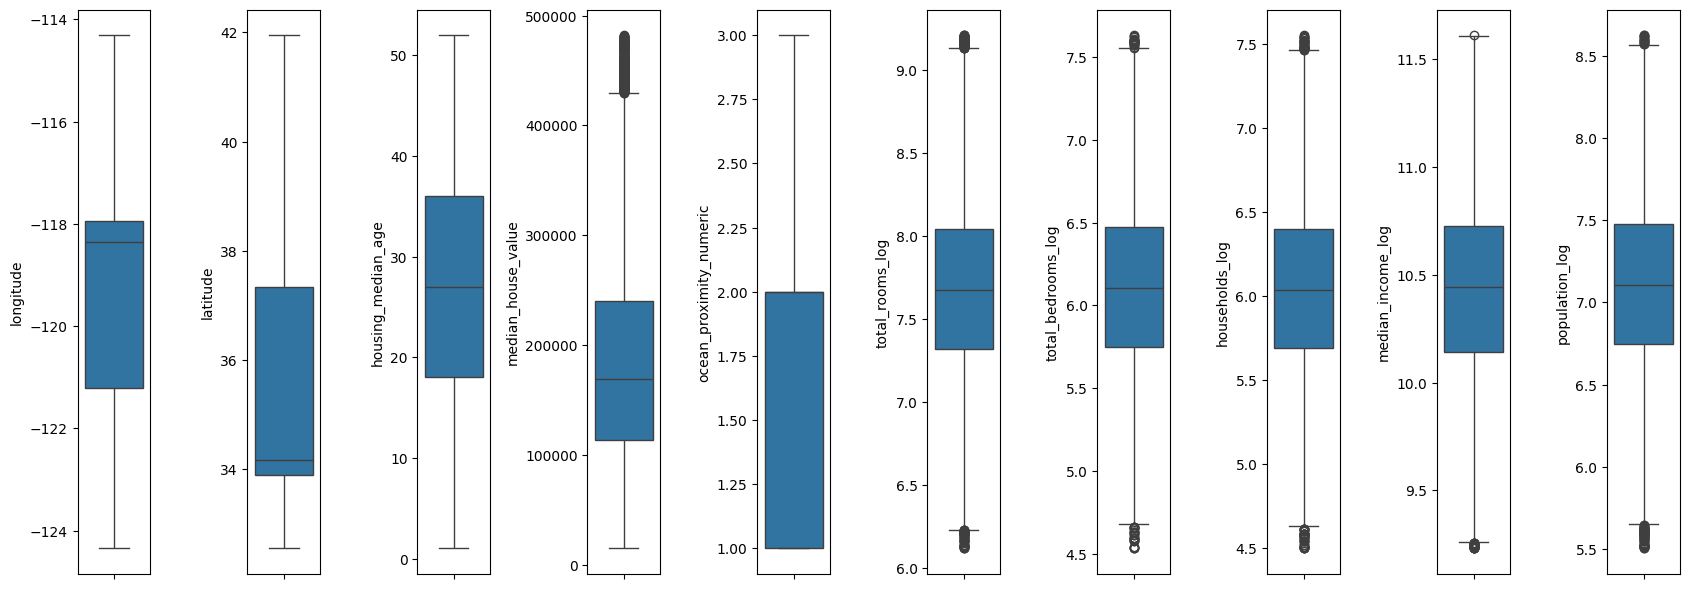

In [88]:
# Make a new boxplots using transformed data
cleaned_variables = cleaned_data.columns
fig, axes = plt.subplots(1, len(cleaned_variables), figsize=(17, 6))

for ax, column in zip(axes, cleaned_variables):
    sns.boxplot(y=cleaned_data[column], ax=ax)

plt.tight_layout()
plt.show()

### Scale data

In [89]:
scaler = StandardScaler()
scaled_cleaned_data = preprocessing.StandardScaler().fit_transform(cleaned_data)
scaled_cleaned_data = pd.DataFrame(scaled_cleaned_data, columns=['longitude',
                                                  'latitude',
                                                  'housing_median_age',
                                                  'ocean_proximity_numeric',
                                                  'total_rooms_log',
                                                  'total_bedrooms_log',
                                                  'households_log',
                                                  'median_income_log',
                                                  'median_house_value',
                                                  'population_log'])


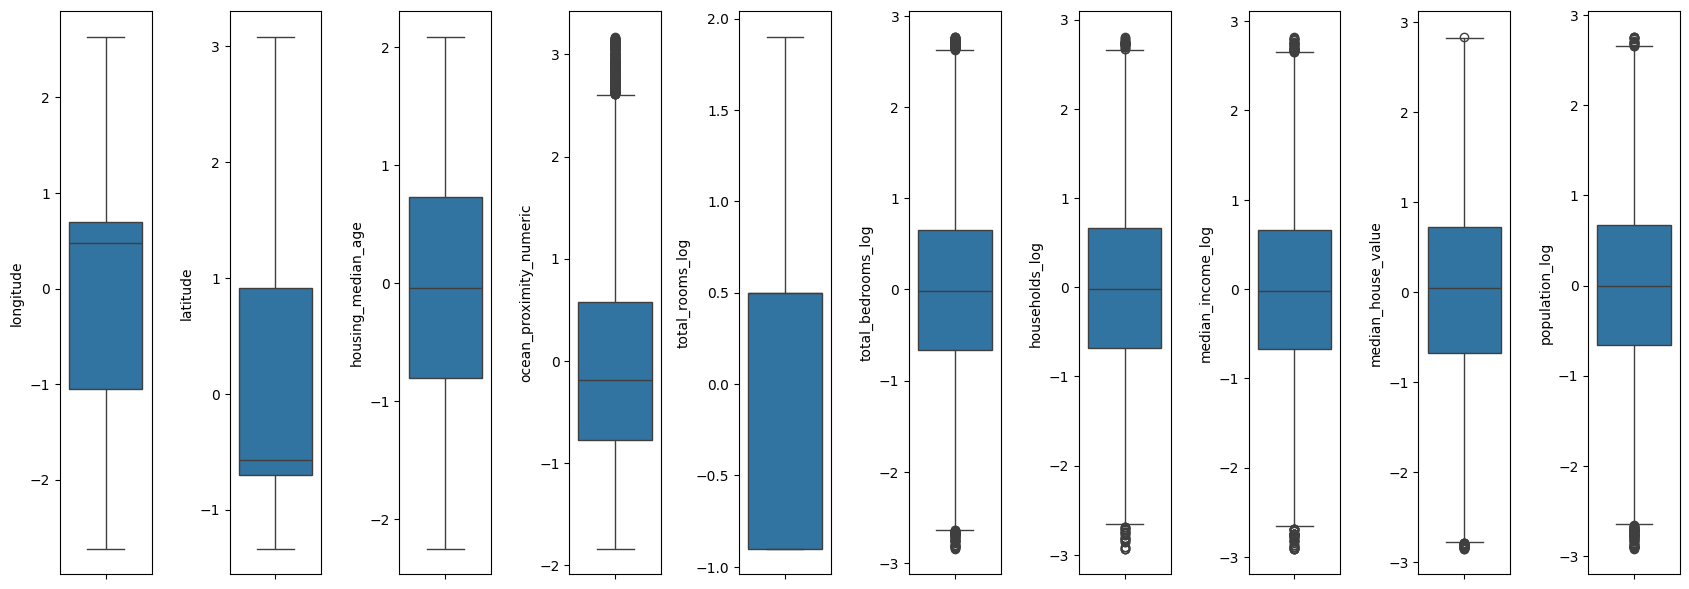

In [90]:
# Make a new boxplots using transformed data
scaled_cleaned_variables = scaled_cleaned_data.columns
fig, axes = plt.subplots(1, len(scaled_cleaned_variables), figsize=(17, 6))

for ax, column in zip(axes, scaled_cleaned_variables):
    sns.boxplot(y=scaled_cleaned_data[column], ax=ax)

plt.tight_layout()
plt.show()

In [91]:
scaled_cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16198 entries, 0 to 16197
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   longitude                16198 non-null  float64
 1   latitude                 16198 non-null  float64
 2   housing_median_age       16198 non-null  float64
 3   ocean_proximity_numeric  16198 non-null  float64
 4   total_rooms_log          16198 non-null  float64
 5   total_bedrooms_log       16198 non-null  float64
 6   households_log           16198 non-null  float64
 7   median_income_log        16198 non-null  float64
 8   median_house_value       16198 non-null  float64
 9   population_log           16198 non-null  float64
dtypes: float64(10)
memory usage: 1.2 MB


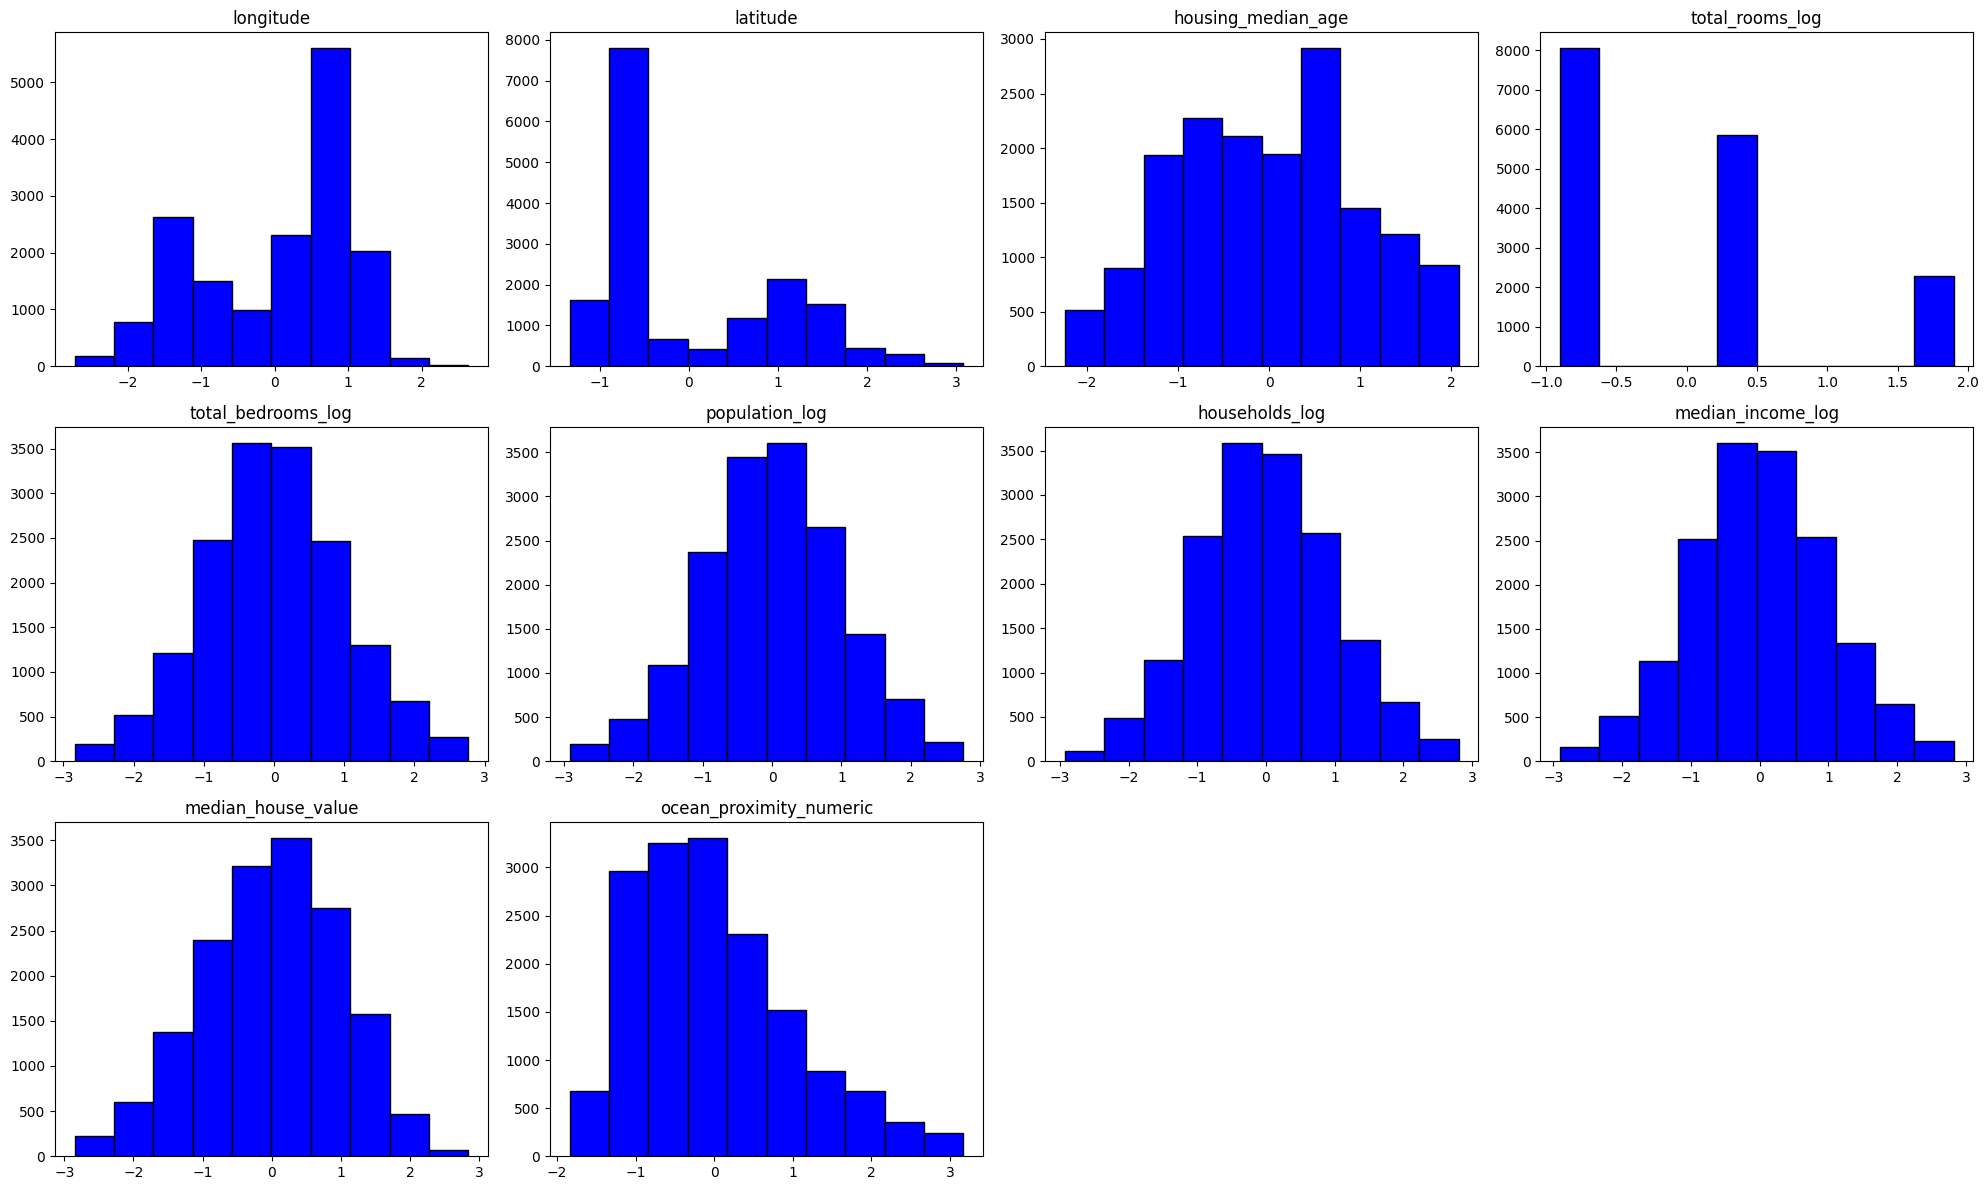

In [92]:
# Crea una figura con 10 subfiguras para mostrar histogramas
fig = plt.figure(figsize=(20, 12))

# Añade subfiguras
ax1 = fig.add_subplot(3, 4, 1)
ax2 = fig.add_subplot(3, 4, 2)
ax3 = fig.add_subplot(3, 4, 3)
ax4 = fig.add_subplot(3, 4, 4)
ax5 = fig.add_subplot(3, 4, 5)
ax6 = fig.add_subplot(3, 4, 6)
ax7 = fig.add_subplot(3, 4, 7)
ax8 = fig.add_subplot(3, 4, 8)
ax9 = fig.add_subplot(3, 4, 9)
ax10 = fig.add_subplot(3, 4, 10)

# Personaliza series de datos de los histogramas
ax1.set_title("longitude")
ax1.hist(scaled_cleaned_data["longitude"], color="blue", edgecolor='black')

ax2.set_title("latitude")
ax2.hist(scaled_cleaned_data["latitude"], color="blue", edgecolor='black')

ax3.set_title("housing_median_age")
ax3.hist(scaled_cleaned_data["housing_median_age"], color="blue", edgecolor='black')

ax4.set_title("total_rooms_log")
ax4.hist(scaled_cleaned_data["total_rooms_log"], color="blue", edgecolor='black')

ax5.set_title("total_bedrooms_log")
ax5.hist(scaled_cleaned_data["total_bedrooms_log"], color="blue", edgecolor='black')

ax6.set_title("population_log")
ax6.hist(scaled_cleaned_data["population_log"], color="blue", edgecolor='black')

ax7.set_title("households_log")
ax7.hist(scaled_cleaned_data["households_log"], color="blue", edgecolor='black')

ax8.set_title("median_income_log")
ax8.hist(scaled_cleaned_data["median_income_log"], color="blue", edgecolor='black')

ax9.set_title("median_house_value")
ax9.hist(scaled_cleaned_data["median_house_value"], color="blue", edgecolor='black')

ax10.set_title("ocean_proximity_numeric")
ax10.hist(scaled_cleaned_data["ocean_proximity_numeric"], color="blue", edgecolor='black')

plt.tight_layout()
plt.show()

### Correlation

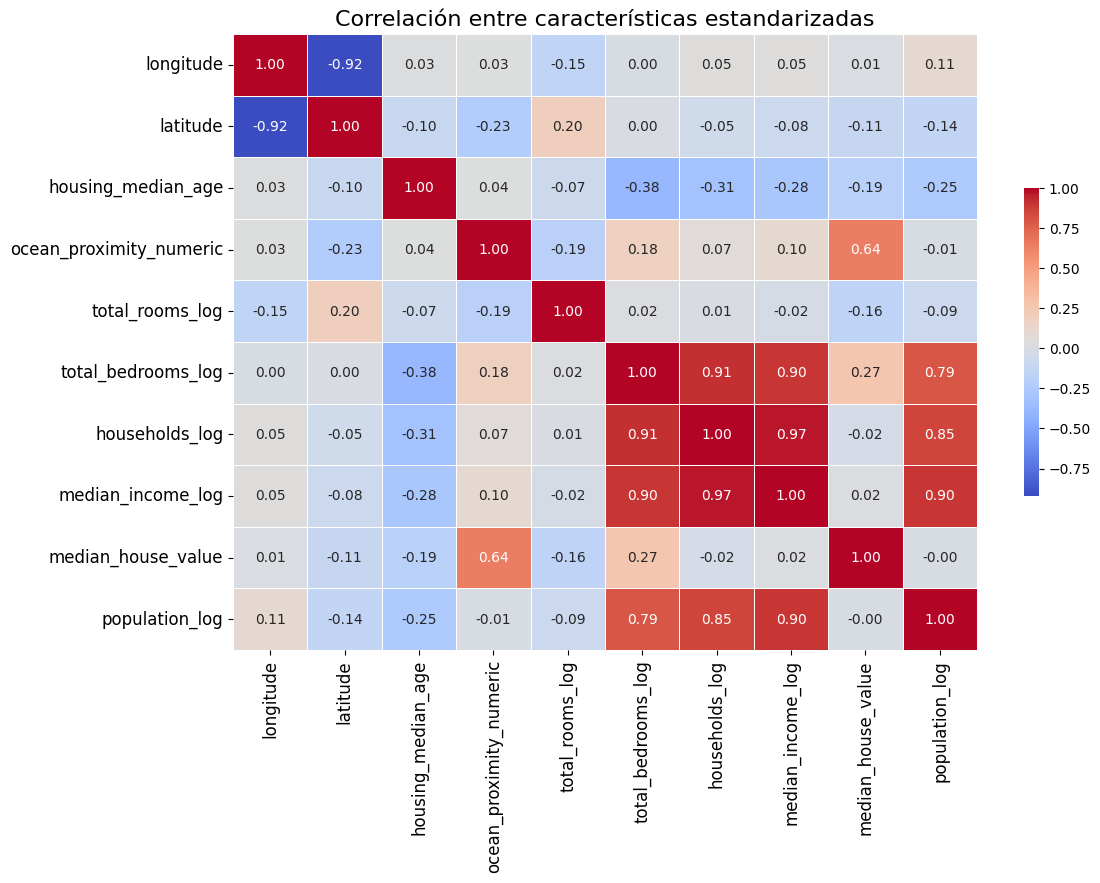

In [93]:
# Crea el mapa de calor
plt.figure(figsize=(12, 8))
sns.heatmap(scaled_cleaned_data.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, cbar_kws={"shrink": .5})

# Añade un título
plt.title('Correlación entre características estandarizadas', fontsize=16)

# Ajusta el tamaño de la fuente de los valores de correlación
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)

# Muestra el mapa de calor
plt.show()


<font color='lightblue'> **Observation:** </font>
At first glance, it could be said that the strongest correlation is given by the proximity of the houses to the ocean. However, later on, we will use metrics provided by the scikit-learn library that will better illustrate the correlation coefficients of each variable used in the predictive model.

## Data Splitting

The objective will be predicted with the different dataframes created during the preprocessing of the data, to observe the reduction (or not) of errors in each step.

### Transformed Data

In [94]:
# Separate features (independent variables) and target variable (dependent variable)
X_td = transformed_data.drop(['median_house_value'], axis = 1)
Y_td = transformed_data['median_house_value']


### Cleaned Data

In [95]:
# Separate features (independent variables) and target variable (dependent variable)
X_cd = cleaned_data.drop(['median_house_value'], axis = 1)
Y_cd = cleaned_data['median_house_value']

### Scaled and Cleaned Data

In [96]:
# Separate features (independent variables) and target variable (dependent variable)
X_scd = scaled_cleaned_data.drop(['median_house_value'], axis = 1)
Y_scd = scaled_cleaned_data['median_house_value']

## Model **Training**

In [97]:
def train_and_predict(X, Y):
    # Split the data into training and testing sets (80% training, 20% testing)
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

    # Create a linear regression model
    model = LinearRegression()

    # Train the model on the training data
    model.fit(X_train, y_train)

    # Predict the target variable on the test data
    y_pred = model.predict(X_test)

    return y_pred, y_test, model, X_train

### Transformed Data

In [98]:
y_pred_td, y_test_td, model_td, X_train_td = train_and_predict(X_td, Y_td)

In [99]:
# Retrieve the coefficients (weights) of the trained linear regression model
coefficient = model_td.coef_

# Retrieve the column names of the features (independent variables)
cols = X_train_td.columns

# Create a DataFrame to visualize the coefficients along with the feature names
coefficient_df = pd.DataFrame({'Feature': cols, 'Coefficient': coefficient})

coefficient_df

,Feature,Coefficient
0,longitude,-44052.115917
1,latitude,-43990.780215
2,housing_median_age,1133.569230
3,ocean_proximity_numeric,-3366.857551
4,total_rooms_log,-38273.387838
5,total_bedrooms_log,95324.937349
6,households_log,33796.397939
7,median_income_log,158863.254123
8,population_log,-90251.469326


### Cleaned Data

In [100]:
y_pred_cd, y_test_cd, model_cd, X_train_cd = train_and_predict(X_cd, Y_cd)

In [101]:
# Retrieve the coefficients (weights) of the trained linear regression model
coefficient = model_cd.coef_

# Retrieve the column names of the features (independent variables)
cols = X_train_cd.columns

# Create a DataFrame to visualize the coefficients along with the feature names
coefficient_df = pd.DataFrame({'Feature': cols, 'Coefficient': coefficient})

coefficient_df

,Feature,Coefficient
0,longitude,-38527.811190
1,latitude,-38149.388289
2,housing_median_age,810.831606
3,ocean_proximity_numeric,-7163.399674
4,total_rooms_log,-42598.630853
5,total_bedrooms_log,84658.154462
6,households_log,46769.981835
7,median_income_log,141479.952760
8,population_log,-81412.799996


### Scaled adn Cleaned Data

In [102]:
y_pred_scd, y_test_scd, model_scd, X_train_scd = train_and_predict(X_scd, Y_scd)

In [103]:
# Retrieve the coefficients (weights) of the trained linear regression model
coefficient = model_scd.coef_

# Retrieve the column names of the features (independent variables)
cols = X_train_scd.columns

# Create a DataFrame to visualize the coefficients along with the feature names
coefficient_df = pd.DataFrame({'Feature': cols, 'Coefficient': coefficient})

coefficient_df

,Feature,Coefficient
0,longitude,-0.166231
1,latitude,-0.247395
2,housing_median_age,-0.123557
3,ocean_proximity_numeric,0.413607
4,total_rooms_log,-0.078552
5,total_bedrooms_log,1.449287
6,households_log,-1.442788
7,median_income_log,-0.010297
8,population_log,0.035042


## Metrics

<font color= 'red'> **NOTE:**:</font>
Given the creation of multiple dataframes throughout the data processing, it was decided to train regression models for each one and assess their percentage errors since they are in different scales. Hence, we will observe the MAPE of the different datasets and continue analyzing metrics solely from the dataframe with the best outcome.

In [104]:
# Calcula el promedio de los errores porcentuales para obtener el MAPE
percentage_errors_td = np.abs((y_test_td - y_pred_td) / y_test_td) * 100
mape_td = np.mean(percentage_errors_td).round(2)
percentage_errors_cd = np.abs((y_test_cd - y_pred_cd) / y_test_cd) * 100
mape_cd = np.mean(percentage_errors_cd).round(2)
percentage_errors_scd = np.abs((y_test_scd - y_pred_scd) / y_test_scd) * 100
mape_scd = np.mean(percentage_errors_scd).round(2)

print("Transformed Data Mean Absolute Percentage Error (MAPE):", mape_td,"%")
print("Cleaned Data Mean Absolute Percentage Error (MAPE):", mape_cd,"%")
print("Scaled and Cleaned Data Mean Absolute Percentage Error (MAPE):", mape_scd,"%")

Transformed Data Mean Absolute Percentage Error (MAPE): 33.65 %
Cleaned Data Mean Absolute Percentage Error (MAPE): 28.56 %
Scaled and Cleaned Data Mean Absolute Percentage Error (MAPE): 332.29 %


<font color='lightblue'> **Observation:** </font>
As we can observe, the data scaling might have been counterproductive, or the method chosen might not have been appropriate. Therefore, we proceed to evaluate the 'cleaned_data' dataset, in which outliers were removed using the IQR method.

In [105]:
print('Cleaned Data MedAE:', np.median(np.abs(y_test_cd - y_pred_cd)).round(2)) #Numpy method
print('Cleaned Data MAE:', metrics.mean_absolute_error(y_test_cd, y_pred_cd).round(2)) #SickitLearn method
print('Cleaned Data RMSE:', np.sqrt(metrics.mean_squared_error(y_test_cd, y_pred_cd)).round(2)) #Numpy method
print("Determination Coefficient (R^2):", r2_score(y_test_cd, y_pred_cd)) #SickitLearn method

Cleaned Data MedAE: 36083.27
Cleaned Data MAE: 44186.28
Cleaned Data RMSE: 57497.14
Determination Coefficient (R^2): 0.6196055591068592


### Explanation

 Mean Absolute Error $(MAE)$:

$$MAE = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i|$$

 Median Absolute Error $(MedAE)$:
$$MedAE = \text{median}(|y - \hat{y}|)$$

 Mean Absolute Percentage Error $(MAPE)$:
$$MAPE = \frac{1}{n} \sum_{i=1}^{n} \left| \frac{y_i - \hat{y}_i}{y_i} \right| \times 100$$

 Root Mean Squared Error $(RMSE)$:
$$RMSE = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2}$$

Determination Coefficient $(R^2)$:
$$ R^2 = 1 - \frac{{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}}{{\sum_{i=1}^{n} (y_i - \bar{y})^2}} $$

Where:
- $(\hat{y}_i)$ predicted value.
- $({y}_i )$ test value.
- $(\hat{y})$ is the mean of the predicted values.
- $(\bar{y})$ is the mean of test values
- ( N ) is the total number of data points.

<font color='lightblue'> **Mean Absolute Error (MAE):** </font>

- Measures the average absolute difference between the predicted values and the actual values.
- Provides a straightforward interpretation of the average error magnitude without considering the direction of errors.
- Useful for understanding the typical magnitude of errors in the predictions.

<font color='lightblue'> **Median Absolute Error (MedAE):** </font>
- Similar to MAE, but instead of averaging the absolute errors, it takes the median.
- More robust to outliers compared to MAE, as it is less sensitive to extreme values.
- Useful when dealing with datasets containing outliers or skewed distributions.

<font color='lightblue'> **Mean Absolute Percentage Error (MAPE):** </font>
- Measures the average percentage difference between the predicted values and the actual values.
- Provides insight into the relative error magnitude, making it useful for comparing models across different scales.
- Commonly used in forecasting and time series analysis.

<font color='lightblue'> **Root Mean Squared Error (RMSE):** </font>
- Measures the square root of the average squared difference between the predicted values and the actual values.
- Penalizes larger errors more heavily than smaller errors due to squaring.
- Provides a measure of the spread of errors, with values in the same units as the target variable.

<font color='lightblue'> **Determination Coefficient (R²):** </font>
- Measures the proportion of the variance in the dependent variable that is predictable from the independent variables.
- Provides insight into how well the regression model fits the data.
- Ranges from 0 to 1, where 1 indicates a perfect fit and 0 indicates no linear relationship between the variables.

# Conclusion

The Median Absolute Error (MedAE) of approximately 36,083.27 and the Mean Absolute Error (MAE) of around 44,186.28 suggest that, on average, the model's predictions deviate by these amounts from the actual values. The MedAE, being robust to outliers, provides insight into the typical prediction error magnitude, while the MAE offers a straightforward interpretation of the average error magnitude.

The Root Mean Squared Error (RMSE) of about $57,497.14 penalizes larger errors more heavily than smaller errors due to squaring, providing a measure of the spread of errors. It suggests that the model's predictions, on average, differ from the actual values by this amount when considering the squared errors.

Observing the relationship between MAE and RMSE, we note that the RMSE is typically larger than the MAE due to the squaring effect. Therefore, while the MAE provides an average measure of the absolute prediction error magnitude, the RMSE accounts for the variability of errors and emphasizes the importance of larger errors in the overall performance assessment.

Overall, the determination coefficient $(R2)$ of approximately 0.62 indicates that the model explains about 62% of the variance in the dependent variable. This suggests that the model has some predictive power, but there is still room for improvement.

### Possible Improvements

In [ ]:
data = {'y_test_cd': y_test_cd.round(2), 'y_pred_cd': y_pred_cd.round(2)}
df = pd.DataFrame(data)
print(df['y_pred_cd'].min())
print(df['y_pred_cd'].max())


-65880.76
393379.83


- Review prediction ranges: It's necessary to review prediction ranges to ensure that predicted values fall within meaningful ranges consistent with the problem context. The presence of negative values may indicate issues in the model or data processing.

- Implement more suitable scaling: Explore and apply more appropriate scaling methods for the dataset, considering variable characteristics and data distribution. This can enhance model stability and performance.

- Improve correlations between variables: Investigate and analyze relationships between independent variables and the target variable. Identifying and selecting the most relevant features can enhance the model's predictive capability.

- Experiment with outlier cleaning methods: Experiment with alternative outlier detection and removal methods, such as Isolation Forest (iForest), to identify nonlinear patterns or anomalies in the data that may impact model performance.

- Experiment with dimensionality reduction methods: Explore dimensionality reduction techniques, such as principal component analysis (PCA), to reduce the number of features and capture the most important information while reducing computational complexity.

- Analyzing the possibility of creating calculated variables, although these may increase information bias.

### Concepts learned

- Exploratory Analysis: Data is analyzed through various statistical metrics (standard deviation, quartiles, minimum and maximum ranges, etc.).
- Data Normalization: Methods for scaling and discretizing data. This aids in model prediction.
- Data Distribution: Scikit-learn's linear regression models perform better with normal distributions. Therefore, it is preferable to work with or adapt the data to such distribution.
- Outliers: Atypical data points are commonly found in a dataset, leading to bias and adversely affecting model prediction.
Null Values: It's essential to ensure there are no null values in the dataset. If present, they should be removed or modified according to the data context.
- Data Correlation: A relationship between dependent variables and the target variable should be sought. The closer this correlation is to 1 or -1, the better the target value can be predicted.
- Evaluation Metrics: Typical metrics were learned to observe specific outcomes of the target variable (MAE, RMSE, and MedAE) and to assess the model's efficiency (R2).